In [ ]:
!nvidia-smi

Wed Feb  4 19:36:12 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip -q /content/data.zip.zip -d /content/custom_data

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

#train_val_split.py script
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2026-02-04 19:42:44--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2026-02-04 19:42:44 (51.7 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 57
Number of annotation files: 57
Images moving to train: 51
Images moving to validation: 6


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.8 MB/s eta 0:00:00


In [ ]:

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 5
names:
- Body
- Joyce Byers
- Soldiers
- Vecna
- Will Byers


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=30 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, io

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 101 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

image 1/6 /content/data/validation/images/00556c4b-Screenshot_967.jpg: 384x640 1 Vecna, 57.0ms
image 2/6 /content/data/validation/images/54b331ac-Screenshot_1120.jpg: 384x640 1 Will Byers, 10.9ms
image 3/6 /content/data/validation/images/92ee26b8-Screenshot_1131.jpg: 384x640 1 Will Byers, 10.9ms
image 4/6 /content/data/validation/images/95d15333-Screenshot_946.jpg: 384x640 1 Vecna, 10.9ms
image 5/6 /content/data/validation/images/c4f9ebfb-Screenshot_1129.jpg: 384x640 1 Will Byers, 10.8ms
image 6/6 /content/data/validation/images/ddb86565-Screenshot_958.jpg: 384x640 1 Body, 1 Joyce Byers, 10.9ms
Speed: 1.8ms preprocess, 18.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


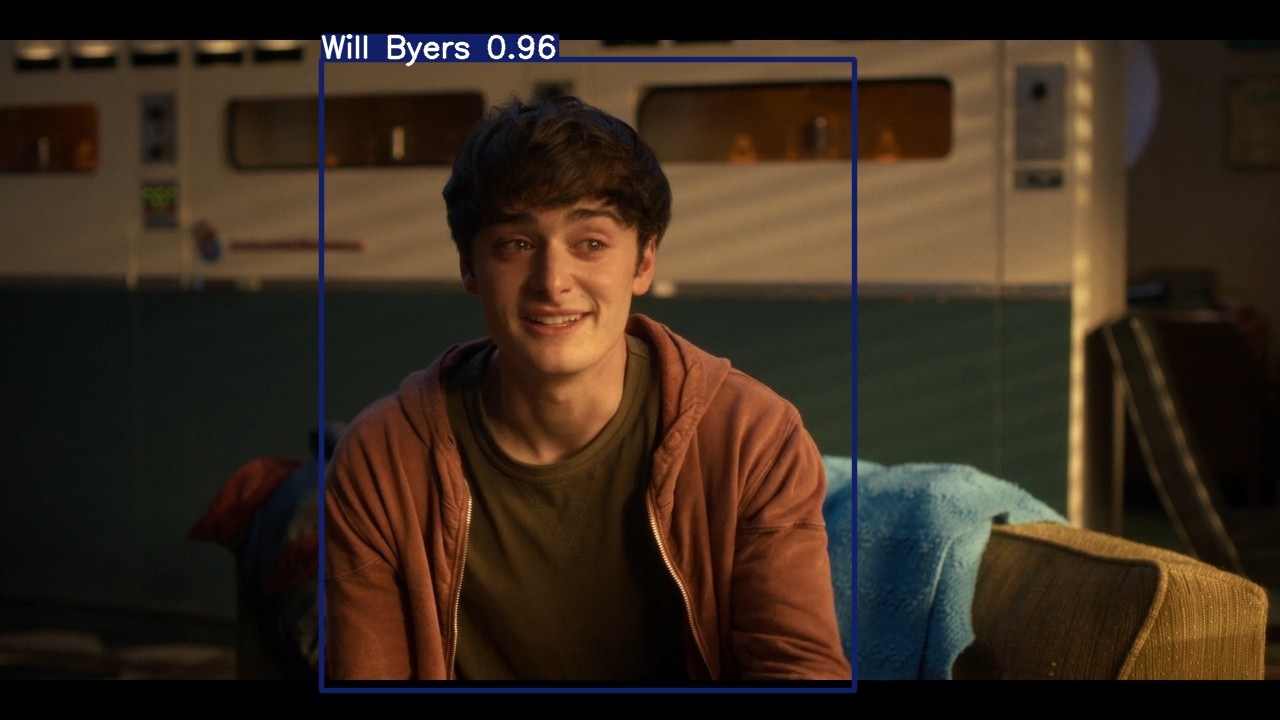

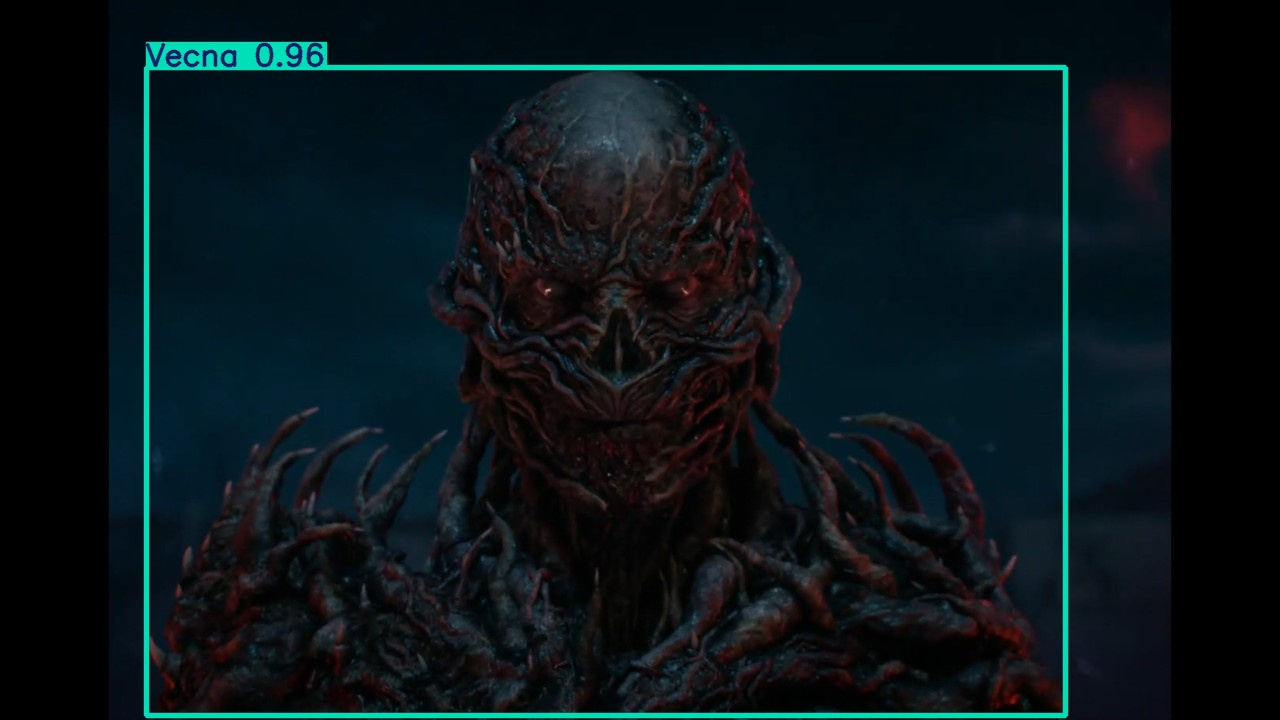

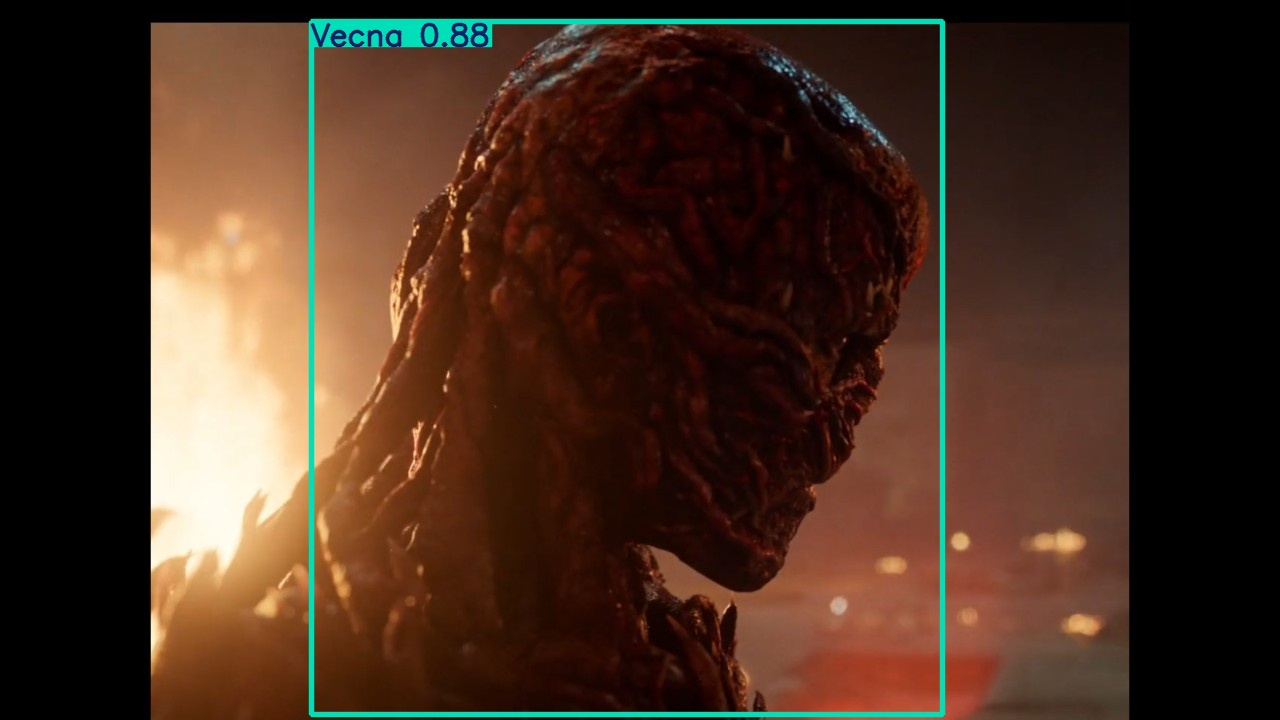

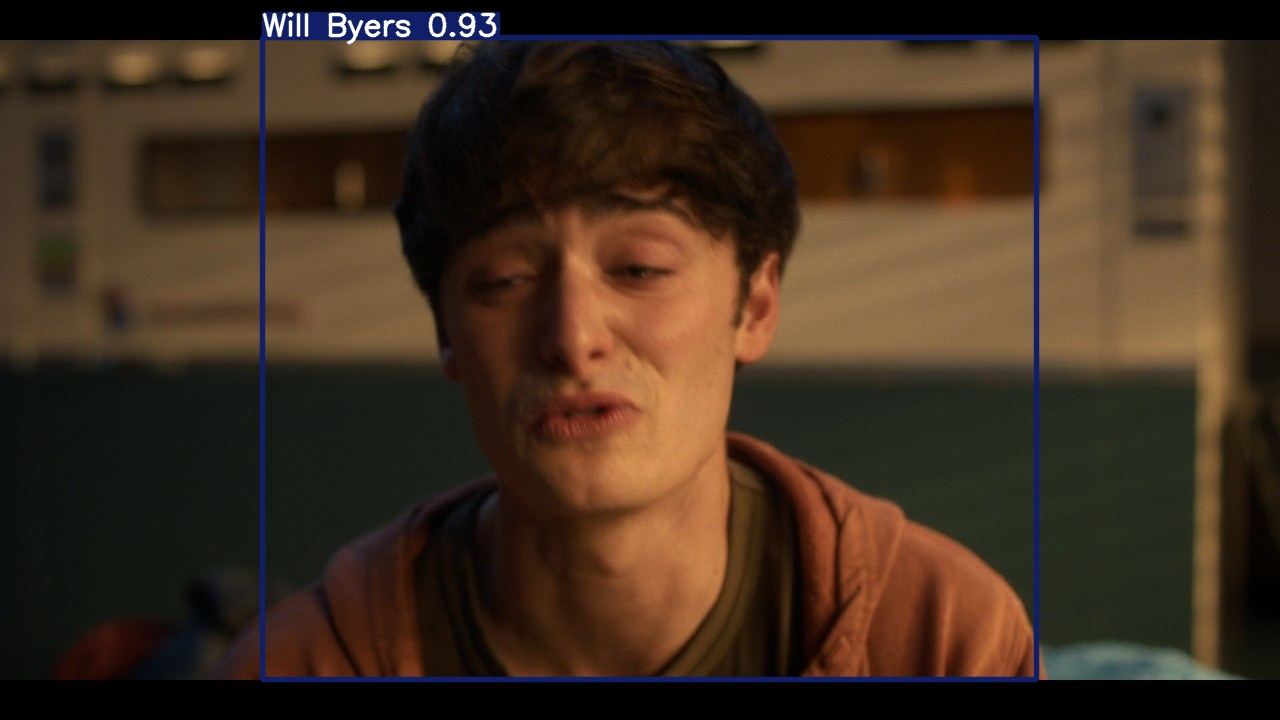

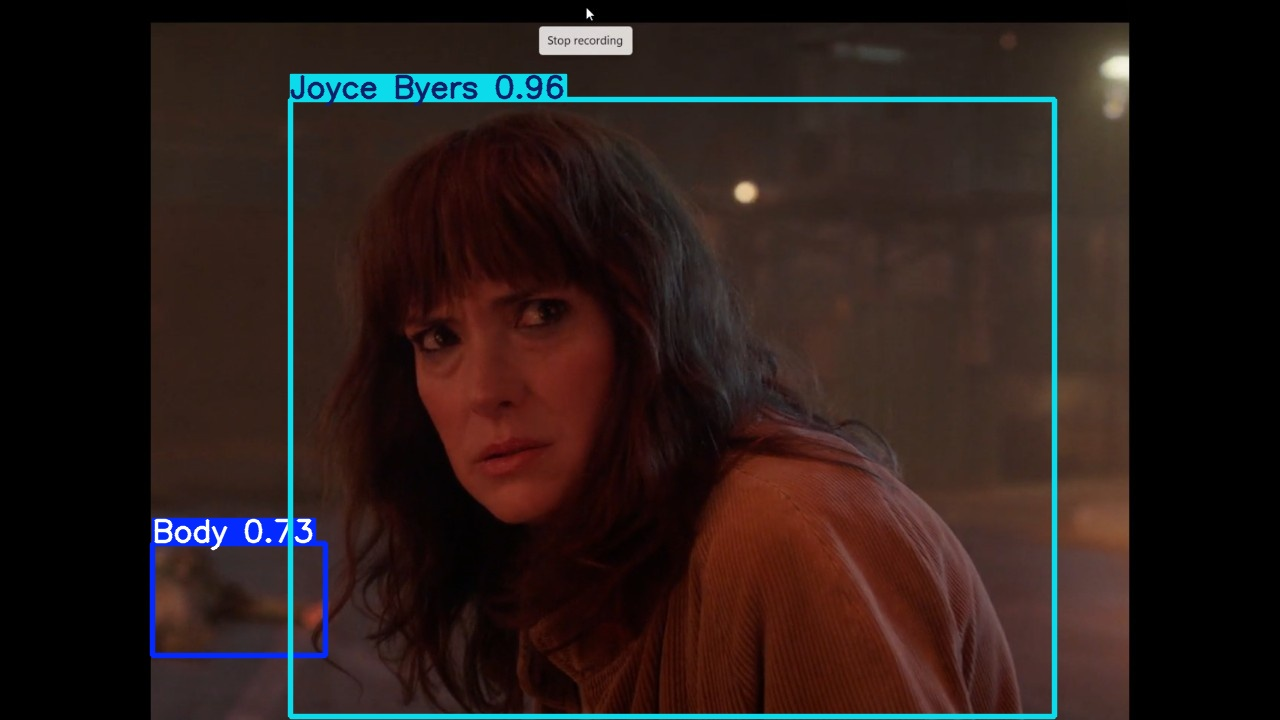

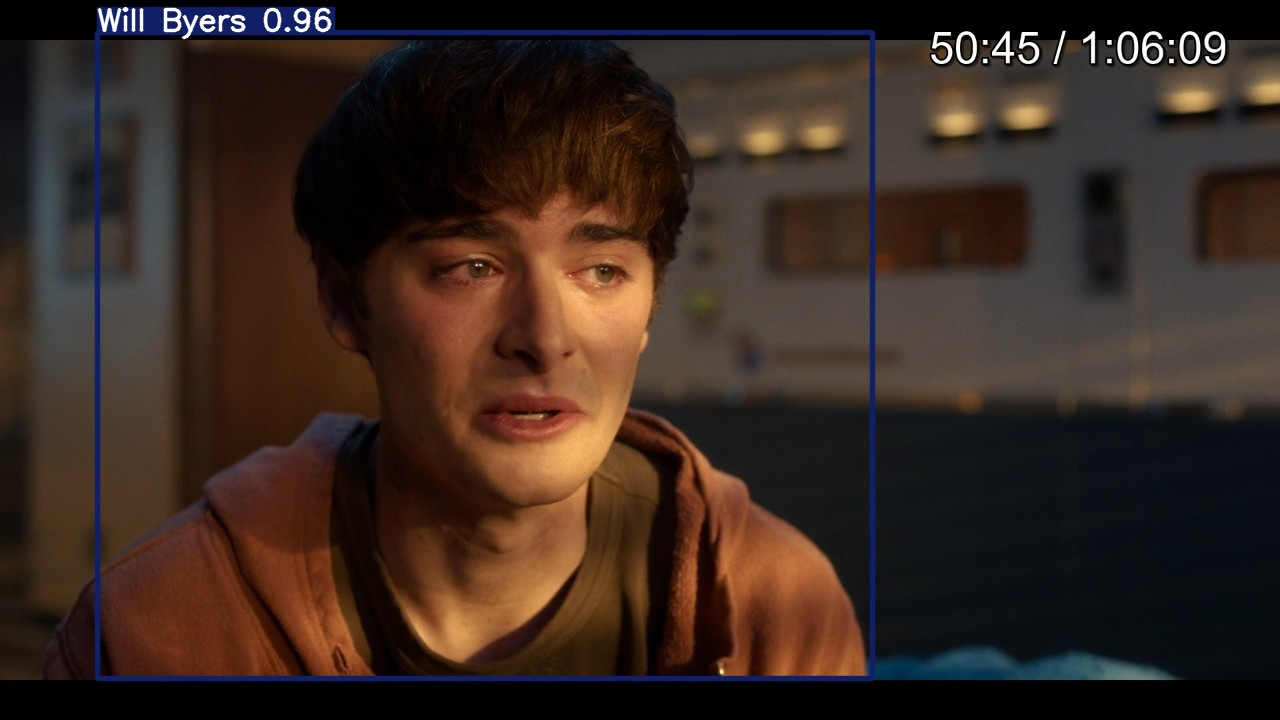

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/args.yaml (deflated 53%)
  adding: train/BoxF1_curve.png (deflated 9%)
  adding: train/BoxR_curve.png (deflated 16%)
  adding: train/train_batch2.jpg (deflated 9%)
  adding: train/train_batch80.jpg (deflated 18%)
  adding: train/val_batch0_labels.jpg (deflated 22%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/train_batch81.jpg (deflated 20%)
  adding: train/train_batch1.jpg (deflated 11%)
  adding: train/confusion_matrix_normalized.png (deflated 28%)
  adding: train/confusion_matrix.png (deflated 28%)
  adding: train/results.csv (deflated 61%)
  adding: train/BoxP_curve.png (deflated 12%)
  adding: train/labels.jpg (deflated 44%)
  adding: train/BoxPR_curve.png (deflated 26%)
  adding: train/train_batch82.jpg (deflated 20%)
  adding: train/val_batch0_pred.jpg (deflated 22%)
  adding: train/

In [ ]:
# download the model
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from ultralytics import YOLO
from google.colab import files
import os, glob

# 1. UPLOAD SMALL CLIP
uploaded = files.upload()
clip_name = list(uploaded.keys())[0]
print(f"Clip: {clip_name}")

# 2. LOAD MODEL
model = YOLO("/content/runs/detect/train/weights/best.pt")

# 3. PROCESS (CORRECT ARGS - NO font_size)
results = model(
    f"/content/{clip_name}",
    save=True,
    project="/content/runs/detect",
    name="final_video",
    conf=0.45,
    imgsz=640,
    line_width=3   # ← only valid args
)

# 4. DOWNLOAD VIDEO
final_folder = "/content/runs/detect/final_video"
video_files = glob.glob(f"{final_folder}/*.mp4")
image_files = glob.glob(f"{final_folder}/*.jpg")

if video_files:
    files.download(video_files[0])
    print(f"VIDEO: {video_files[0]}")
elif image_files:
    # Download short video
    for img in image_files[:3]:
        files.download(img)
    print(f"Images: {len(image_files)} downloaded")
else:
    print( os.listdir(final_folder) if os.path.exists(final_folder) else "Folder not found")


Saving Screen Recording 2025-12-10 171059 (1) (1).mp4 to Screen Recording 2025-12-10 171059 (1) (1) (1).mp4
Clip: Screen Recording 2025-12-10 171059 (1) (1) (1).mp4

WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1021) /content/Screen Recording 2025-12-10 171059 (1) (1) (1).mp4: 480x640 1 Soldiers, 13.0ms
video 1/1 (frame 2/1021) /content/Screen Recording 2025-12-10 171059 (1) (1) (1).mp4: 480x640 1 Soldiers, 12.4ms
video 1/1 (frame 3/1021) /content/Screen Recording 2025-12-10 17105